In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset from CSV
train_data = pd.read_csv('train (1).csv')

# Display the first few rows of the dataset
print(HouseDF.head())
print(HouseDF.shape)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [61]:
# Select features and target for training
features = ['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
X_train = train_data[features]
y_train = train_data['SalePrice']
print(X_train.head())

   LotArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr
0     8450             1             0         2         1             3
1     9600             0             1         2         0             3
2    11250             1             0         2         1             3
3     9550             1             0         1         0             3
4    14260             1             0         2         1             4


In [62]:
X_train.describe()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,0.425342,0.057534,1.565068,0.382877,2.866438
std,9981.264932,0.518911,0.238753,0.550916,0.502885,0.815778
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,9478.500000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,11601.500000,1.000000,0.000000,2.000000,1.000000,3.000000
max,215245.000000,3.000000,2.000000,3.000000,2.000000,8.000000


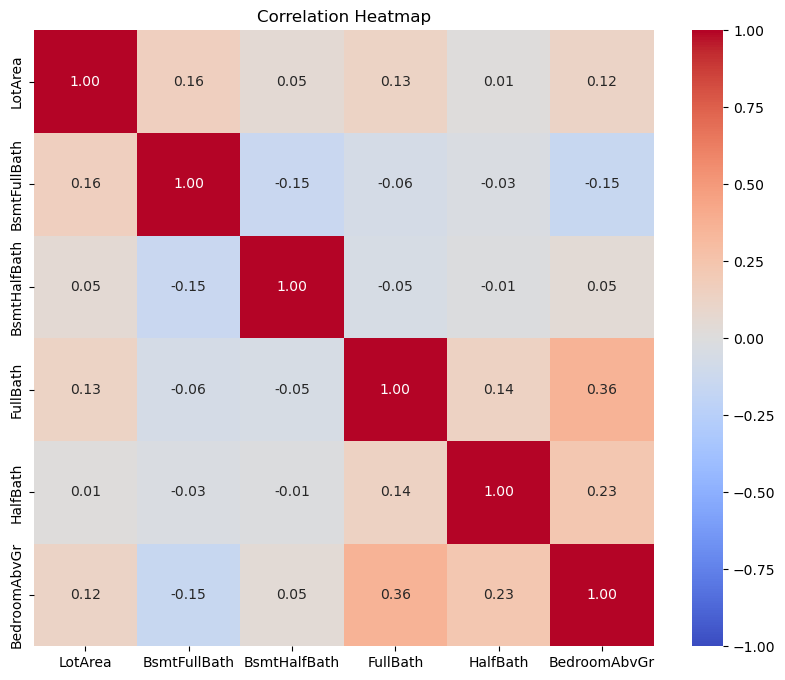

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset_2 is your pandas DataFrame with the required columns
# Extract the relevant columns including the target variable
selected_columns = ['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
df_selected = X_train[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [64]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

In [67]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the test dataset
test_data_path = r'C:\Users\DELL\Downloads\test.csv'
test_data = pd.read_csv(test_data_path)

# Select features for testing
features = ['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
X_test = test_data[features]

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# Make predictions on the testing set
predicted_prices = model.predict(X_test_imputed)

# If you need the imputed data back as a DataFrame
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=features)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
# Create a DataFrame to store predicted prices with 'ID' and 'SalePrice' columns
submission_df = pd.DataFrame({
    'ID': test_data['Id'],
    'SalePrice': predicted_prices
})

# Print the contents of the CSV file
print("The Predicted Price:")
print(submission_df)


The Predicted Price:
        ID      SalePrice
0     1461  115380.571335
1     1462  146845.528162
2     1463  223464.786369
3     1464  218912.545038
4     1465  184696.389401
...    ...            ...
1454  2915  132272.919685
1455  2916  132223.284655
1456  2917  146838.371825
1457  2918  112787.106836
1458  2919  218497.738001

[1459 rows x 2 columns]


In [69]:
# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


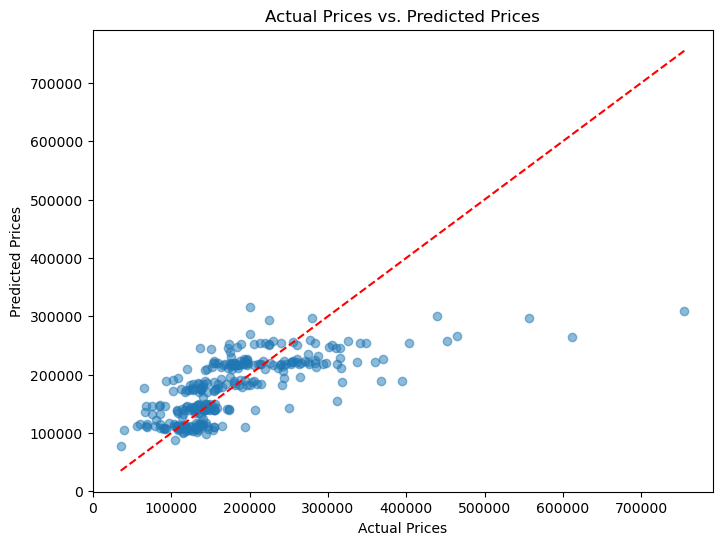

In [70]:
# Plot scatter plot for actual prices vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2668\3351274582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_val - y_pred), bins=50)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


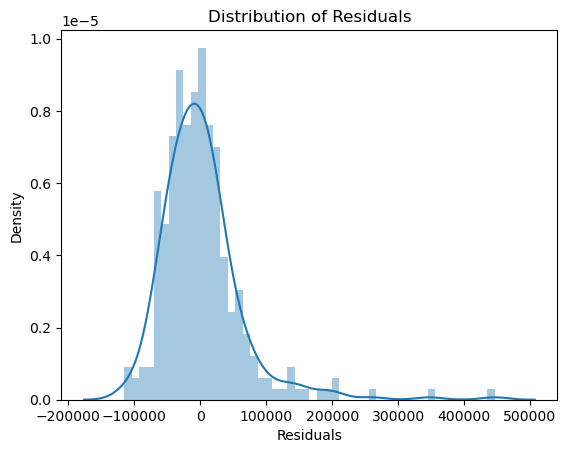

In [71]:
# Residuals plot (distribution of errors)
sns.distplot((y_val - y_pred), bins=50)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [72]:
# Regression evaluation metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error (MAE): 41678.4370252178
Mean Squared Error (MSE): 3994446760.838479
Root Mean Squared Error (RMSE): 63201.635744959
